**Problem Statement** : 

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately. 

**Data Description**

Variable - Definition

record_ID - Unique ID for each week store sku combination.

week - Starting Date of the week

store_id - Unique ID for each store (no numerical order to be assumed)

sku_id - Unique ID for each product (no numerical order to be assumed)

total_price - Sales Price of the product

base_price - Base price of the product

is_featured_sku - Was part of the featured item of the week

is_display_sku - Product was on display at a prominent place at the store

units_sold - (Target) Total Units sold for that week-store-sku combination


In [1]:
'''Importing Important libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
from datetime import datetime

In [2]:
import os

In [3]:
os.getcwd

<function nt.getcwd()>

In [4]:
#defining path of the file
os.chdir('C:\\Users\\abini\\OneDrive\\Desktop\\Analytics Vidya course\\ML\\Linear Regression Project')

In [5]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [6]:
#Keeping a copy of original train and test data.
train_data_or = train_data.copy()
test_data_or = test_data.copy()

In [7]:
train_data.shape

(150150, 9)

There are 150150 rows and 9 features present in train data.

In [8]:
test_data.shape

(13860, 8)

13860 rows in 8 features are present in test data.

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [10]:
test_data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

No null values are present in test data

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [12]:
train_data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

As we can see, there is only one null value present in the entire train data, and the null value is seen in total_price feature.

## Missing Value Treatment

In [13]:
#To study the nature of missing value
train_data[train_data["total_price"].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


The **null value** in total_price has it's respective **units_sold as 1**.

In [14]:
print("Mean value of total_price for 1 units sold is", train_data["total_price"][train_data["units_sold"]==1].mean())

Mean value of total_price for 1 units sold is 291.72627737226435


In [15]:
#Treating missing value of total_price with mean value of total price corresponding to one units_sold.
train_data["total_price"] = train_data["total_price"].fillna(train_data["total_price"][train_data["units_sold"]==1].mean())
train_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [16]:
train_data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

No more missing values are present in train data.

## Feature Creation

Creating week_number, month, day and, year features from date.

In [17]:
train_data['date'] = pd.to_datetime(train_data['week'])                         #creating a column named date from week feature
train_data.drop(['week'], axis = 1, inplace =True)                              # dropping 'week feature' 
train_data["year"] = train_data["date"].dt.year
train_data["month"]= train_data['date'].dt.month
train_data["day_name"] = train_data["date"].dt.day_name()
train_data["week_number"] = train_data['date'].dt.week

In [18]:
train_data.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,year,month,day_name,week_number
0,1,8091,216418,99.0375,111.8625,0,0,20,2011-01-17,2011,1,Monday,3
1,2,8091,216419,99.0375,99.0375,0,0,28,2011-01-17,2011,1,Monday,3
2,3,8091,216425,133.9500,133.9500,0,0,19,2011-01-17,2011,1,Monday,3
3,4,8091,216233,133.9500,133.9500,0,0,44,2011-01-17,2011,1,Monday,3
4,5,8091,217390,141.0750,141.0750,0,0,52,2011-01-17,2011,1,Monday,3


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   store_id         150150 non-null  int64         
 2   sku_id           150150 non-null  int64         
 3   total_price      150150 non-null  float64       
 4   base_price       150150 non-null  float64       
 5   is_featured_sku  150150 non-null  int64         
 6   is_display_sku   150150 non-null  int64         
 7   units_sold       150150 non-null  int64         
 8   date             150150 non-null  datetime64[ns]
 9   year             150150 non-null  int64         
 10  month            150150 non-null  int64         
 11  day_name         150150 non-null  object        
 12  week_number      150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 14.9+ 

We can see store_id, sku_id, week_number, month, year are categorical feature but their datatype is int64, day_name is also categorical but it's already in object type.

Thus changing the datatypes of categorical features to str. 

And record_id is a unique identification id for each entry in the data and, it's not required for model building, thus dropping that feature from data.

In [20]:
train_data['store_id'] = train_data['store_id'].astype('str')
train_data['sku_id'] = train_data['sku_id'].astype('str')
train_data["year"] = train_data["year"].astype('str')
train_data["week_number"] = train_data["week_number"].astype('str')
train_data["month"] = train_data["month"].astype('str')
train_data.drop(columns = ['record_ID', 'date'], axis = 1, inplace =True)

In [21]:
train_data.nunique()

store_id            76
sku_id              28
total_price        647
base_price         572
is_featured_sku      2
is_display_sku       2
units_sold         708
year                 3
month               12
day_name             7
week_number         51
dtype: int64

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         150150 non-null  object 
 1   sku_id           150150 non-null  object 
 2   total_price      150150 non-null  float64
 3   base_price       150150 non-null  float64
 4   is_featured_sku  150150 non-null  int64  
 5   is_display_sku   150150 non-null  int64  
 6   units_sold       150150 non-null  int64  
 7   year             150150 non-null  object 
 8   month            150150 non-null  object 
 9   day_name         150150 non-null  object 
 10  week_number      150150 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 12.6+ MB


No fishy values are found in train_data.

Making the same changes in **test data** aswell.

In [23]:
test_data['date'] = pd.to_datetime(test_data['week'])                          #creating a column named date from week feature
test_data.drop(['week'], axis = 1, inplace =True)                              # dropping 'week feature' 
test_data["year"] = test_data["date"].dt.year
test_data["month"]= test_data['date'].dt.month
test_data["day_name"] = test_data["date"].dt.day_name()
test_data["week_number"] = test_data['date'].dt.week  

In [24]:
test_data['store_id'] = test_data['store_id'].astype('str')
test_data['sku_id'] = test_data['sku_id'].astype('str')
test_data["year"] = test_data["year"].astype('str')
test_data["week_number"] = test_data["week_number"].astype('str')
test_data["month"] = test_data["month"].astype('str')
test_data.drop(columns = ['record_ID', 'date'], axis = 1, inplace =True)

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         13860 non-null  object 
 1   sku_id           13860 non-null  object 
 2   total_price      13860 non-null  float64
 3   base_price       13860 non-null  float64
 4   is_featured_sku  13860 non-null  int64  
 5   is_display_sku   13860 non-null  int64  
 6   year             13860 non-null  object 
 7   month            13860 non-null  object 
 8   day_name         13860 non-null  object 
 9   week_number      13860 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [26]:
test_data.nunique()

store_id            76
sku_id              28
total_price        442
base_price         370
is_featured_sku      2
is_display_sku       2
year                 1
month                7
day_name             4
week_number         12
dtype: int64

No fishy values are seen in test_data.

## Outlier Treatment

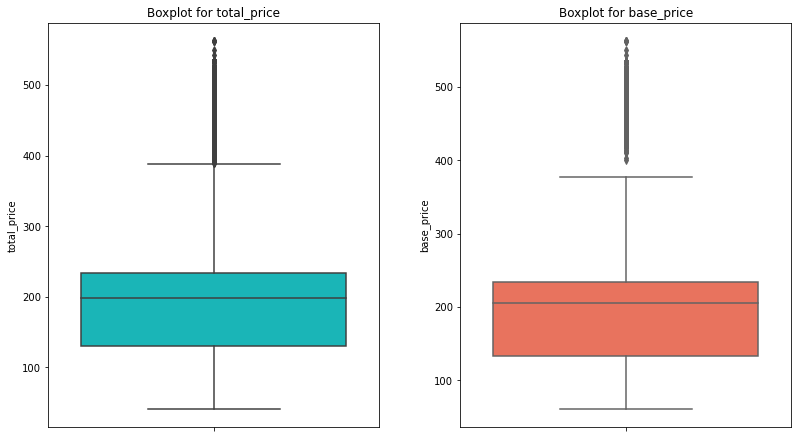

In [27]:
#plotting box plot of total_price and base_price features from train data.
plt.figure(figsize = (12, 7))

plt.subplot(1, 2, 1)
sns.boxplot(y = train_data['total_price'], color = 'darkturquoise')
plt.title("Boxplot for total_price")

plt.subplot(1, 2, 2)
sns.boxplot(y = train_data['base_price'], color = 'tomato')
plt.title("Boxplot for base_price")

plt.tight_layout(pad = 4)
plt.show()

Lot of outliers can be seen in both total_price and base_price

Treating Outliers using **IQR(Inner Quantile Range)** method.

In [28]:
q1=train_data["total_price"].quantile(.25)
q3=train_data["total_price"].quantile(.75)
iqr = q3-q1
print(q1)
print(q3)
print(iqr)

130.3875
233.7
103.3125


In [29]:
lf_tp=q1-(1.5*iqr)
print("lower fence of total price is", lf_tp)
uf_tp = q3 + (1.5*iqr)
print("upper fence of total price is",uf_tp)

lower fence of total price is -24.58125000000001
upper fence of total price is 388.66875


In [30]:
q1=train_data["base_price"].quantile(.25)
q3=train_data["base_price"].quantile(.75)
iqr = q3-q1
print(q1)
print(q3)
print(iqr)

133.2375
234.4125
101.17499999999998


In [31]:
lf_bp=q1-(1.5*iqr)
print("lower fence of base price is",lf_bp)
uf_bp = q3 + (1.5*iqr)
print("upper fence of base price is",uf_bp)

lower fence of base price is -18.524999999999977
upper fence of base price is 386.17499999999995


In [32]:
#Since base_price and total_price can't be negative, thus taking lower fence value of both as 0.
train_data1=train_data.loc[(train_data["total_price"]>0) & (train_data["total_price"]<uf_tp) & (train_data["base_price"]>0)& (train_data["base_price"]<uf_bp)]
train_data1.reset_index(inplace = True, drop = True)
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133027 entries, 0 to 133026
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         133027 non-null  object 
 1   sku_id           133027 non-null  object 
 2   total_price      133027 non-null  float64
 3   base_price       133027 non-null  float64
 4   is_featured_sku  133027 non-null  int64  
 5   is_display_sku   133027 non-null  int64  
 6   units_sold       133027 non-null  int64  
 7   year             133027 non-null  object 
 8   month            133027 non-null  object 
 9   day_name         133027 non-null  object 
 10  week_number      133027 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 11.2+ MB


After outlier treatment 133027 rows are present in 9 features of train data with 0 null values.

## Skewness

In [33]:
colors = ["olive", "maroon"]

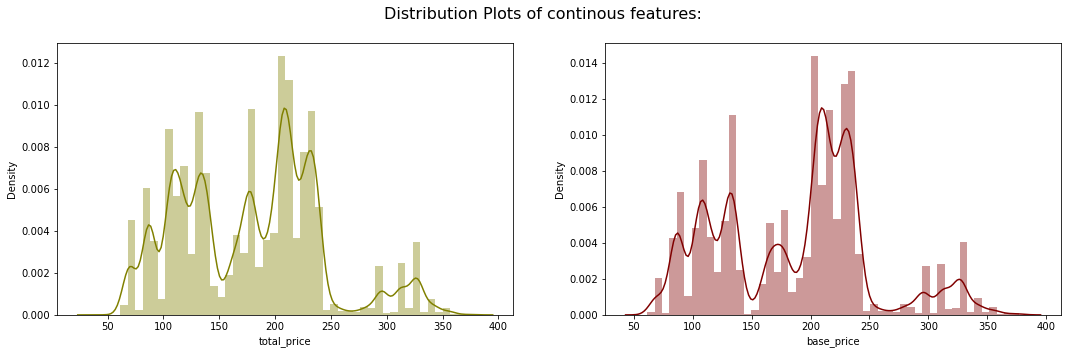

In [34]:
clist = ['total_price', 'base_price']
#color_list = ['plum', 'cornflowerblue', 'mediumspringgreen']
plt.figure(figsize = (18, 5))
plt.suptitle("Distribution Plots of continous features:", fontsize=16)
for i in range(0, len(clist)):
    plt.subplot(1, 2, i+1)
    sns.distplot(train_data1[clist[i]], color = colors[i])

In [35]:
train_data1.loc[:,'total_price':'base_price'].skew()

total_price    0.368554
base_price     0.210979
dtype: float64

The data is symmetric since the skewness is < 0.5

## HANDLING CATEGORICAL FEATURES

In [36]:
train_data2= train_data1.copy()

In [37]:
train_data2['is_featured_sku'].value_counts()

0    123290
1      9737
Name: is_featured_sku, dtype: int64

In [38]:
train_data2['is_display_sku'].value_counts()

0    117124
1     15903
Name: is_display_sku, dtype: int64

Features, 'is_featured_sku' and 'is_display_sku' are alreday encoded.

### Encoding store_id's, sku_id's with top units_sold with 1 and remaing as 0. 

In [39]:
# Group the data by the 'store_id' column and calculate the sum of the 'units_sold' column
units_sold_by_store = train_data2.groupby('store_id')['units_sold'].sum()

# Sort the data in descending order by the sum of units sold
units_sold_by_store_sorted = units_sold_by_store.sort_values(ascending=False)

In [40]:
units_sold_by_store_sorted.head(12)

store_id
8023    273409
9845    247358
9823    217509
9112    208630
9613    190272
8222    183178
8095    181964
9611    178998
9250    157508
9481    145946
9961    145746
8869    145664
Name: units_sold, dtype: int64

In [41]:
# Select the top 10 store ID's
top_10_store = units_sold_by_store_sorted.head(10).index

# Replace the top 10 store ID's with 1 and rest with 0
train_data2['store_id'] = train_data2['store_id'].apply(lambda x: 1 if x in top_10_store  else 0)

# Display the resulting dataframe
train_data2.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day_name,week_number
0,0,216418,99.0375,111.8625,0,0,20,2011,1,Monday,3
1,0,216419,99.0375,99.0375,0,0,28,2011,1,Monday,3
2,0,216425,133.9500,133.9500,0,0,19,2011,1,Monday,3
3,0,216233,133.9500,133.9500,0,0,44,2011,1,Monday,3
4,0,217390,141.0750,141.0750,0,0,52,2011,1,Monday,3


In [42]:
top_10_store

Index(['8023', '9845', '9823', '9112', '9613', '8222', '8095', '9611', '9250',
       '9481'],
      dtype='object', name='store_id')

In [43]:
train_data2['store_id'].value_counts()

0    112487
1     20540
Name: store_id, dtype: int64

In [44]:
# Group the data by the 'sku_id' column and calculate the sum of the 'units_sold' column
units_sold_by_sku = train_data2.groupby('sku_id')['units_sold'].sum()

# Sort the data in descending order by the sum of units sold
units_sold_by_sku_sorted = units_sold_by_sku.sort_values(ascending=False)

In [45]:
units_sold_by_sku_sorted.head(5)

sku_id
219009    964194
216418    786087
223245    650165
216419    628711
222087    601228
Name: units_sold, dtype: int64

In [46]:
# Select the top 3 sku ID's
top_3_sku = units_sold_by_sku_sorted.head(3).index

# Replace the top 3 sku ID's with 1 and rest with 0
train_data2['sku_id'] = train_data2['sku_id'].apply(lambda x: 1 if x in top_3_sku else 0)

# Display the resulting dataframe
train_data2.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day_name,week_number
0,0,1,99.0375,111.8625,0,0,20,2011,1,Monday,3
1,0,0,99.0375,99.0375,0,0,28,2011,1,Monday,3
2,0,0,133.9500,133.9500,0,0,19,2011,1,Monday,3
3,0,0,133.9500,133.9500,0,0,44,2011,1,Monday,3
4,0,0,141.0750,141.0750,0,0,52,2011,1,Monday,3


In [47]:
top_3_sku

Index(['219009', '216418', '223245'], dtype='object', name='sku_id')

In [48]:
train_data2['sku_id'].value_counts()

0    104947
1     28080
Name: sku_id, dtype: int64

### Encoding top 'month' and 'week_number' w.r.t value_counts with 1 and rest with 0.

In [49]:
train_data2["month"].value_counts().head(4)

5    14323
2    13309
1    12285
4    12277
Name: month, dtype: int64

In [50]:
top_months =[i for i in train_data2["month"].value_counts().head(2).index ]

In [51]:
train_data2['month'] = train_data2['month'].apply(lambda x: 1 if x in top_months else 0)

In [52]:
train_data2["month"].value_counts()

0    105395
1     27632
Name: month, dtype: int64

In [53]:
train_data2["week_number"].value_counts().head(7)

26    5122
5     5118
22    5116
9     4095
49    4092
18    4092
4     3072
Name: week_number, dtype: int64

In [54]:
top_week_numbers =[i for i in train_data2["week_number"].value_counts().head(4).index ]

In [55]:
train_data2['week_number'] = train_data2['week_number'].apply(lambda x: 1 if x in top_week_numbers else 0)

In [56]:
train_data2["week_number"].value_counts()

0    113576
1     19451
Name: week_number, dtype: int64

### One-Hot Encoding

Encoding 'year' and 'day_name' features by one-hot encoding

In [57]:
En_train_data = pd.get_dummies(train_data2, prefix=['year', "day_name"], columns = ['year', "day_name"])

In [58]:
pd.set_option("display.max_columns",None)

In [59]:
En_train_data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,week_number,year_2011,year_2012,year_2013,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,99.0375,111.8625,0,0,20,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,99.0375,99.0375,0,0,28,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,133.9500,133.9500,0,0,19,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,133.9500,133.9500,0,0,44,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,141.0750,141.0750,0,0,52,0,0,1,0,0,0,1,0,0,0,0,0


### Encoding in test data

In [60]:
test_data1 = test_data.copy()

Replacing the top store_id, sku_id, day from train data with 1 and rest with 0 in test data aswell

In [61]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         13860 non-null  object 
 1   sku_id           13860 non-null  object 
 2   total_price      13860 non-null  float64
 3   base_price       13860 non-null  float64
 4   is_featured_sku  13860 non-null  int64  
 5   is_display_sku   13860 non-null  int64  
 6   year             13860 non-null  object 
 7   month            13860 non-null  object 
 8   day_name         13860 non-null  object 
 9   week_number      13860 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [62]:
test_data1.loc[~test_data1['store_id'].isin(['8023', '9845', '9823', '9112', '9613', '8222', '8095', '9611', '9250','9481']), 'store_id'] = 0

In [63]:
test_data1.loc[test_data1['store_id'].isin(['8023', '9845', '9823', '9112', '9613', '8222', '8095', '9611', '9250','9481']), 'store_id'] = 1

In [64]:
test_data1["store_id"].value_counts()

0    11652
1     2208
Name: store_id, dtype: int64

In [65]:
test_data1.loc[~test_data1['sku_id'].isin(['219009', '216418', '223245']), 'sku_id'] = 0

In [66]:
test_data1.loc[test_data1['sku_id'].isin(['219009', '216418', '223245']), 'sku_id'] = 1

In [67]:
test_data1["sku_id"].value_counts()

0    11268
1     2592
Name: sku_id, dtype: int64

Encoding almost same percent of row_names in month and week_number features of test data with 1, as that is encoded in train data and rest with 0. 

In [68]:
test_data1["month"].value_counts()

7     3465
8     3465
9     2310
6     1155
3     1155
10    1155
1     1155
Name: month, dtype: int64

In [69]:
top_months =[i for i in test_data1["month"].value_counts().head(1).index ]

In [70]:
test_data1['month'] = test_data1['month'].apply(lambda x: 1 if x in top_months else 0)

In [71]:
test_data1["month"].value_counts()

0    10395
1     3465
Name: month, dtype: int64

In [72]:
test_data1.loc[~test_data1['week_number'].isin(['35', '29']), 'week_number'] = 0

In [73]:
test_data1.loc[test_data1['week_number'].isin(['35', '29']), 'week_number'] = 1

In [74]:
test_data1["week_number"].value_counts()

0    11550
1     2310
Name: week_number, dtype: int64

For year and day_name features doing one-hot encoding as done in train data.

In [75]:
En_test_data = pd.get_dummies(test_data1, prefix=['year', 'day_name'], columns = ['year', 'day_name'])

In [76]:
En_test_data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,week_number,year_2013,day_name_Saturday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,108.3000,108.3000,0,0,1,1,1,0,0,1,0
1,0,0,109.0125,109.0125,0,0,1,1,1,0,0,1,0
2,0,0,133.9500,133.9500,0,0,1,1,1,0,0,1,0
3,0,0,133.9500,133.9500,0,0,1,1,1,0,0,1,0
4,0,0,176.7000,176.7000,0,0,1,1,1,0,0,1,0


In [77]:
En_train_data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,week_number,year_2011,year_2012,year_2013,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,99.0375,111.8625,0,0,20,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,99.0375,99.0375,0,0,28,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,133.9500,133.9500,0,0,19,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,133.9500,133.9500,0,0,44,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,141.0750,141.0750,0,0,52,0,0,1,0,0,0,1,0,0,0,0,0


Adding encoded features which are in train data but not in test data to test data aswell, so that while nunning them in model we'll have same features in exact same order in both train and test data.

In [78]:
En_test_data.insert(8, 'year_2011', 0)
En_test_data.insert(9, 'year_2012', 0)
En_test_data.insert(11, 'day_name_Friday', 0)
En_test_data.insert(12, 'day_name_Monday', 0)
En_test_data.insert(14, 'day_name_Sunday', 0)

In [79]:
En_test_data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,week_number,year_2011,year_2012,year_2013,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,108.3000,108.3000,0,0,1,1,0,0,1,0,0,0,0,0,1,0
1,0,0,109.0125,109.0125,0,0,1,1,0,0,1,0,0,0,0,0,1,0
2,0,0,133.9500,133.9500,0,0,1,1,0,0,1,0,0,0,0,0,1,0
3,0,0,133.9500,133.9500,0,0,1,1,0,0,1,0,0,0,0,0,1,0
4,0,0,176.7000,176.7000,0,0,1,1,0,0,1,0,0,0,0,0,1,0


In [80]:
print(En_train_data.shape)
print(En_test_data.shape)

(133027, 19)
(13860, 18)


Now the number of features in both train test data is same except for units_sold to be predicted is not present in test data.

In [81]:
En_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133027 entries, 0 to 133026
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   store_id            133027 non-null  int64  
 1   sku_id              133027 non-null  int64  
 2   total_price         133027 non-null  float64
 3   base_price          133027 non-null  float64
 4   is_featured_sku     133027 non-null  int64  
 5   is_display_sku      133027 non-null  int64  
 6   units_sold          133027 non-null  int64  
 7   month               133027 non-null  int64  
 8   week_number         133027 non-null  int64  
 9   year_2011           133027 non-null  uint8  
 10  year_2012           133027 non-null  uint8  
 11  year_2013           133027 non-null  uint8  
 12  day_name_Friday     133027 non-null  uint8  
 13  day_name_Monday     133027 non-null  uint8  
 14  day_name_Saturday   133027 non-null  uint8  
 15  day_name_Sunday     133027 non-nul

Now all the categorical features are encoded in both train and test data in same way.

## Feature Selection

In [82]:
En_train_data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,week_number,year_2011,year_2012,year_2013,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,99.0375,111.8625,0,0,20,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,99.0375,99.0375,0,0,28,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,133.9500,133.9500,0,0,19,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,133.9500,133.9500,0,0,44,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,141.0750,141.0750,0,0,52,0,0,1,0,0,0,1,0,0,0,0,0


## Correlation

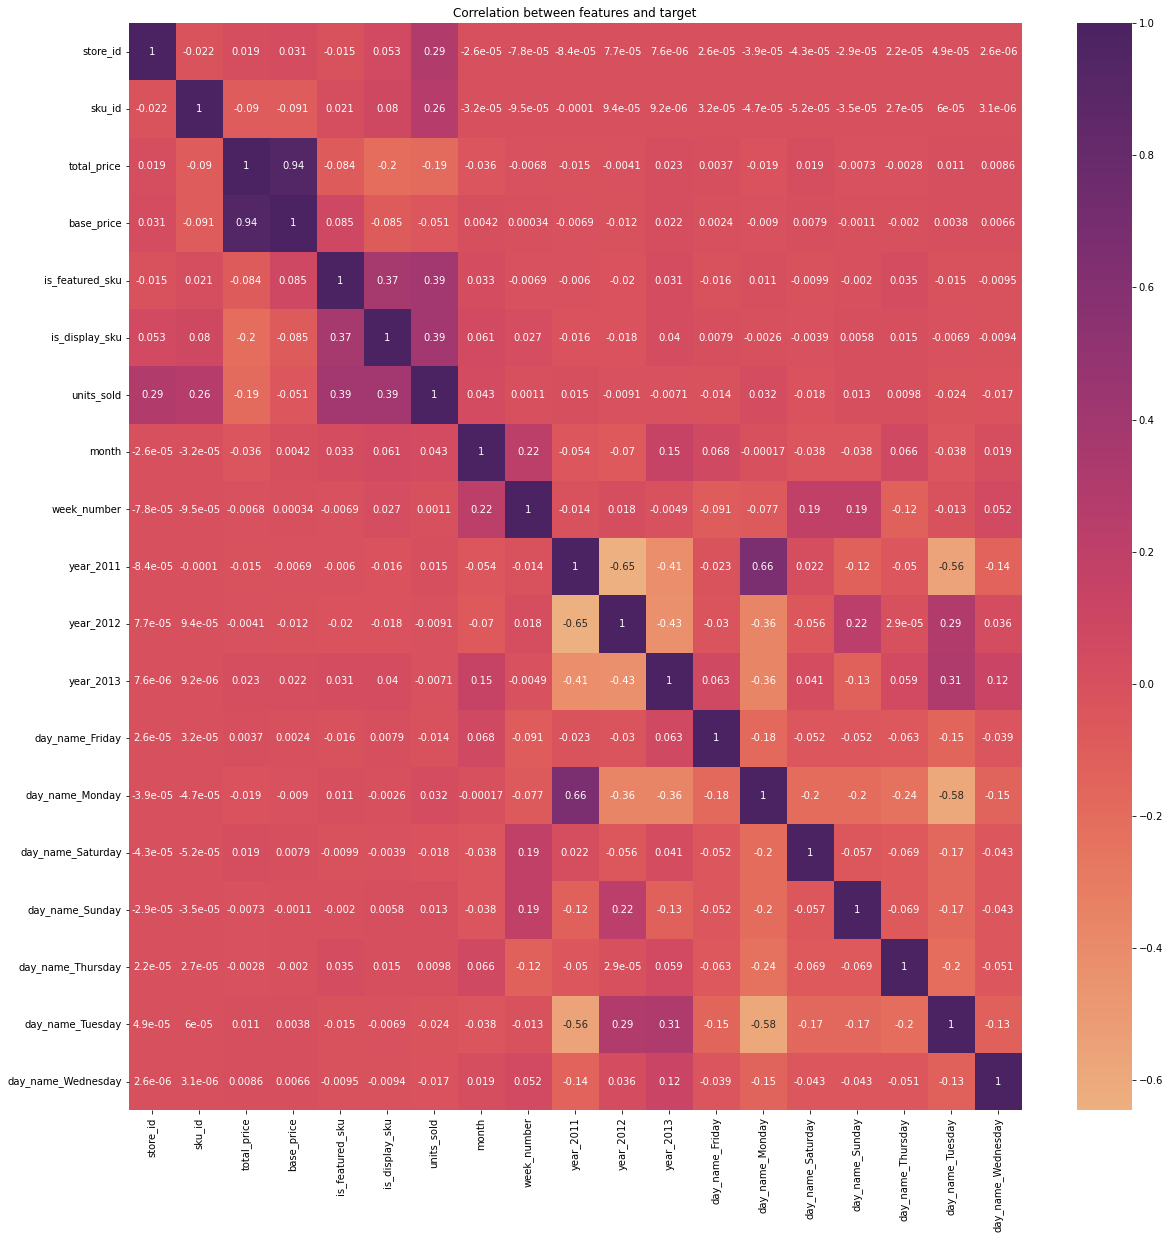

In [83]:
plt.figure(figsize = (20,20))
plt.title("Correlation between features and target")
sns.heatmap(En_train_data.corr(), annot = True, cmap = 'flare')

plt.show()

Features : is_featured_sku, is_displayed_sku, store_id and sku_id are having comparatively best correlation with units_sold.

In [84]:
corr=En_train_data.iloc[:,:].corr()
name_features=corr.index

In [85]:
abs(corr["units_sold"])

store_id              0.287126
sku_id                0.255344
total_price           0.189147
base_price            0.051454
is_featured_sku       0.393627
is_display_sku        0.392092
units_sold            1.000000
month                 0.043338
week_number           0.001053
year_2011             0.015154
year_2012             0.009052
year_2013             0.007149
day_name_Friday       0.013830
day_name_Monday       0.031585
day_name_Saturday     0.018403
day_name_Sunday       0.013248
day_name_Thursday     0.009761
day_name_Tuesday      0.023501
day_name_Wednesday    0.017371
Name: units_sold, dtype: float64

We can see there is correlation between units_sold and other features.

## Remove correlated independent features ( Multi collinearity)

In [86]:
threshold=0.5

In [87]:
df_new = En_train_data.copy()

In [88]:
corr_matrix=En_train_data.corr()

In [89]:
corr_matrix.columns

Index(['store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku',
       'is_display_sku', 'units_sold', 'month', 'week_number', 'year_2011',
       'year_2012', 'year_2013', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [90]:
# find and remove correlated features
def multi_coli(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [91]:
multi_coli(df_new,.5)

{'base_price', 'day_name_Monday', 'day_name_Tuesday', 'year_2012'}

As we can see 'base_price', 'day_name_Monday', 'day_name_Tuesday', 'year_2012' features are multi-collinear, thus dopping them.

In [92]:
df_train_final = En_train_data.drop(['base_price', 'day_name_Monday', 'day_name_Tuesday', 'year_2012'], axis=1)

In [93]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133027 entries, 0 to 133026
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   store_id            133027 non-null  int64  
 1   sku_id              133027 non-null  int64  
 2   total_price         133027 non-null  float64
 3   is_featured_sku     133027 non-null  int64  
 4   is_display_sku      133027 non-null  int64  
 5   units_sold          133027 non-null  int64  
 6   month               133027 non-null  int64  
 7   week_number         133027 non-null  int64  
 8   year_2011           133027 non-null  uint8  
 9   year_2013           133027 non-null  uint8  
 10  day_name_Friday     133027 non-null  uint8  
 11  day_name_Saturday   133027 non-null  uint8  
 12  day_name_Sunday     133027 non-null  uint8  
 13  day_name_Thursday   133027 non-null  uint8  
 14  day_name_Wednesday  133027 non-null  uint8  
dtypes: float64(1), int64(7), uint8(7)


## HANDLING NUMERICAL FEATURES

## Min Max Scaling 
scales the values between 0 to 1. 

### X_scaled = (X - X.min / (X.max - X.min)

In [95]:
#Since units_sold is the target variable, we won't be giving it in X
x = df_train_final.drop(['units_sold'], axis=1)

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate the numerical and encoded features
numerical_features = x.select_dtypes(include=['float64'])
encoded_features = x.select_dtypes(include=['int64', 'uint8'])

# Scale the numerical features
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
scaled_numerical_features = min_max.fit_transform(numerical_features)

# Concatenate the scaled numerical and encoded features
scaled_train_data = pd.concat([pd.DataFrame(scaled_numerical_features), encoded_features], axis=1)

# Get the scaled DataFrame as X
X = scaled_train_data.values

In [97]:
X

array([[0.17197452, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17197452, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27600849, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57961783, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29936306, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57537155, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
Y = df_train_final["units_sold"]

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [100]:
X_test.shape

(26606, 14)

In [101]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lin_model=lr.fit(X_train,Y_train)                      #Model name

In [102]:
lin_model.coef_

array([-33.51043639,  49.06041589,  34.69045531,  72.20150681,
        43.5269053 ,   3.29689723,  -2.14133214,   1.26431698,
        -2.85078844,  -3.62876774,  -2.46173746,   3.32477776,
        -0.91158264,  -2.90990878])

In [103]:
lin_model.intercept_

42.87668375737522

### Calculating RMSLE

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [105]:
Y_pred=lin_model.predict(X_test)

In [117]:
# calculate RMSLE
rmsle = np.sqrt(np.mean((np.log(Y_pred + 1) - np.log(Y_test + 1))**2))

print("Accuracy score for Linear Regression model, RMSLE is", round(rmsle*100,2),"%")

Accuracy score for Linear Regression model, RMSLE is 75.52 %


<AxesSubplot:xlabel='units_sold'>

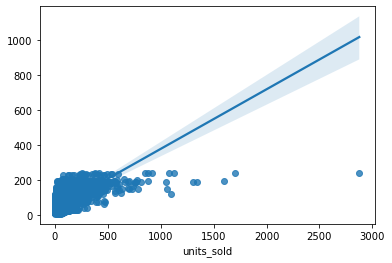

In [107]:
sns.regplot(Y_test,Y_pred)

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

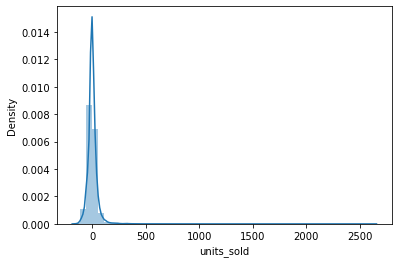

In [108]:
sns.distplot(Y_test-Y_pred)

**X** is the encoded and scaled data of train data.

To Understand what the predicted values looks like, let's try it for **train data**, to have a comparison between actual units sold and predicted units sold.

In [109]:
df_train_final["pred_units_sold"] = lin_model.predict(X)

In [110]:
df_train_final.head()

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,month,week_number,year_2011,year_2013,day_name_Friday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Wednesday,pred_units_sold
0,0,1,99.0375,0,0,20,0,0,1,0,0,0,0,0,0,73.068515
1,0,0,99.0375,0,0,28,0,0,1,0,0,0,0,0,0,38.378059
2,0,0,133.9500,0,0,19,0,0,1,0,0,0,0,0,0,34.891836
3,0,0,133.9500,0,0,44,0,0,1,0,0,0,0,0,0,34.891836
4,0,0,141.0750,0,0,52,0,0,1,0,0,0,0,0,0,34.180361


In [111]:
train_data1["pred_units_sold"] = lin_model.predict(X)
train_data1["pred_units_sold"] = train_data1["pred_units_sold"].round(decimals=0)

In [112]:
Train_pred = train_data1[["store_id", "sku_id","week_number", "units_sold", "pred_units_sold"]]

In [118]:
Train_pred.head(20)

,store_id,sku_id,week_number,units_sold,pred_units_sold
0,8091,216418,3,20,73.0
1,8091,216419,3,28,38.0
2,8091,216425,3,19,35.0
3,8091,216233,3,44,35.0
4,8091,217390,3,52,34.0
5,8091,219009,3,18,60.0
6,8091,219029,3,47,16.0
7,8091,223245,3,50,62.0
8,8091,223153,3,82,145.0
9,8095,216418,3,99,122.0


Predicted_units_sold is not so accurate, but few are nearby the actual units_sold.

In [119]:
#Dropping the features which were dropped from train data.
df_test_final = En_test_data.drop(columns = ['base_price',  'day_name_Monday', 'day_name_Tuesday', 'year_2012'], axis=1)

In [120]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            13860 non-null  object 
 1   sku_id              13860 non-null  object 
 2   total_price         13860 non-null  float64
 3   is_featured_sku     13860 non-null  int64  
 4   is_display_sku      13860 non-null  int64  
 5   month               13860 non-null  int64  
 6   week_number         13860 non-null  object 
 7   year_2011           13860 non-null  int64  
 8   year_2013           13860 non-null  uint8  
 9   day_name_Friday     13860 non-null  int64  
 10  day_name_Saturday   13860 non-null  uint8  
 11  day_name_Sunday     13860 non-null  int64  
 12  day_name_Thursday   13860 non-null  uint8  
 13  day_name_Wednesday  13860 non-null  uint8  
dtypes: float64(1), int64(6), object(3), uint8(4)
memory usage: 1.1+ MB


In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate the numerical and encoded features
numerical_features = df_test_final.select_dtypes(include=['float64'])
encoded_features = df_test_final.select_dtypes(include=['object', 'int64', 'uint8'])

# Scale the numerical features
min_max=MinMaxScaler()
scaled_numerical_features = min_max.fit_transform(numerical_features)

# Concatenate the scaled numerical and encoded features
scaled_test_data = pd.concat([pd.DataFrame(scaled_numerical_features), encoded_features], axis=1)

# Get the scaled test DataFrame as A
A = scaled_test_data.values

**A** is the encoded and scaled data of test data.

In [122]:
df_test_final["pred_units_sold"] = lin_model.predict(A)
df_test_final["pred_units_sold"] = df_test_final["pred_units_sold"].round(decimals = 0)

In [123]:
df_test_final.head()

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,week_number,year_2011,year_2013,day_name_Friday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Wednesday,pred_units_sold
0,0,1,108.3000,0,0,1,1,0,1,0,0,0,0,0,73.0
1,0,0,109.0125,0,0,1,1,0,1,0,0,0,0,0,38.0
2,0,0,133.9500,0,0,1,1,0,1,0,0,0,0,0,37.0
3,0,0,133.9500,0,0,1,1,0,1,0,0,0,0,0,37.0
4,0,0,176.7000,0,0,1,1,0,1,0,0,0,0,0,34.0


In [124]:
test_data["pred_units_sold"] = lin_model.predict(A)
test_data["pred_units_sold"]= test_data["pred_units_sold"].round(decimals=0)

In [125]:
#since we want weekly_prediction w.r.t store and sku id's, only choosing those features along with total_price.
Test_Pred_Sub = test_data[["store_id", "sku_id", "week_number", "pred_units_sold"]]

In [126]:
Test_Pred_Sub.sort_values("week_number", inplace = True)
Test_Pred_Sub.reset_index(inplace = True, drop = True)

In [127]:
Test_Pred_Sub.head(10)

,store_id,sku_id,week_number,pred_units_sold
0,9371,219029,10,19.0
1,9672,223245,10,62.0
2,9672,222765,10,23.0
3,9672,222087,10,28.0
4,9672,219029,10,19.0
5,9672,219009,10,63.0
6,9672,217390,10,30.0
7,9672,223153,10,26.0
8,9672,216233,10,33.0
9,9672,300021,10,78.0


In [128]:
#Saving the resultant df as csv file
Test_Pred_Sub.to_csv("Demand_Prediction_Linear_Regression_Model", index = False)

To Find the best model for this problem statement, checking for other models aswell since LR model's accuracy is not good.

In [783]:
''' Importing all the classification models '''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

In [784]:
from sklearn.metrics import accuracy_score

In [ ]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, Y_train)
pred_lg = lg.predict(X_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(Y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(Y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, Y_train)
pred_knc = knc.predict(X_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(Y_test, pred_knc)*100)


# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)
print("Accuracy Score of Random Forest model is", accuracy_score(Y_test, pred_rfc)*100)


### CROSS VALIDATION:

we will cross validate the model to avoid the overfitting or underfitting of the model.

In [ ]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, X, Y, cv = 5) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, X, Y, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, X, Y, cv = 5)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, X, Y, cv = 5)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")
